In [3]:
import cv2
import numpy as np

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
IMG_DEFAULT1 = "../static/bp.jpg"
IMG_DEFAULT2 = "../static/bl2049_small.jpg"
IMG_DEFAULT3 = "../static/bs_small.jpg"

In [6]:
def get_gray_img(source=IMG_DEFAULT1):
    img = cv2.imread(source)
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return g_img

In [7]:
g_img1 = get_gray_img()
g_img2 = get_gray_img(IMG_DEFAULT2)
g_img3 = get_gray_img(IMG_DEFAULT3)

In [16]:
ret2,th2 = cv2.threshold(g_img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3,th3 = cv2.threshold(g_img1,0,255,cv2.THRESH_OTSU)
ret4,th4 = cv2.threshold(g_img2,0,255,cv2.THRESH_OTSU)

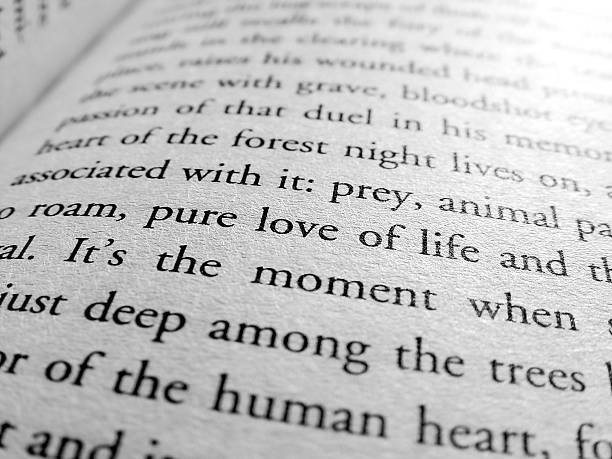

In [12]:
display(Image.fromarray(g_img1))

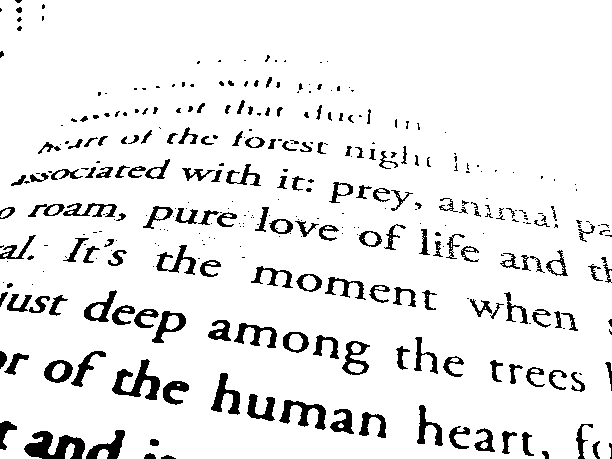

In [14]:
display(Image.fromarray(th2))

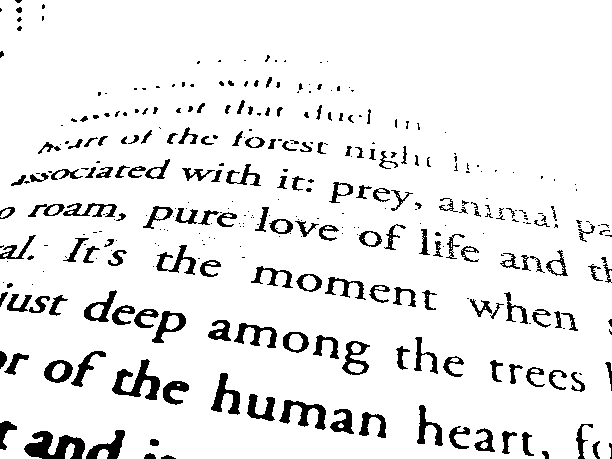

In [15]:
display(Image.fromarray(th3))

69.0


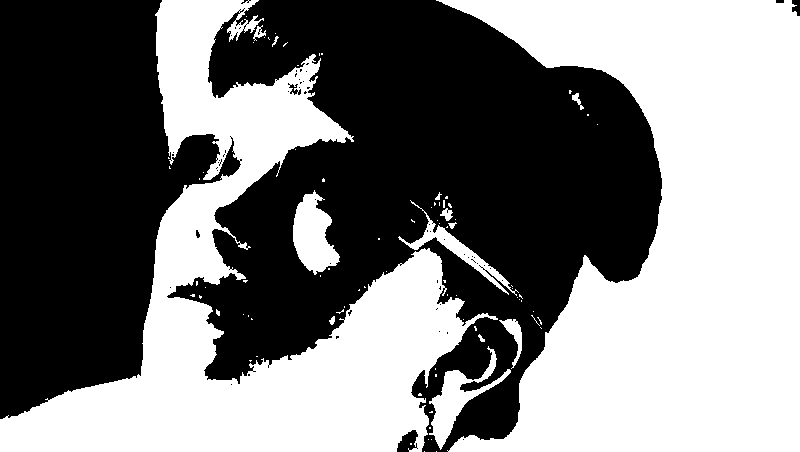

In [114]:
print(ret4)
display(Image.fromarray(th4))

In [13]:
def binary_otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    final_thresh = -1
    final_value = -1
    bins = bins[:-1]
    for t in range(0, 256): # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.sum(bins[:t]*his[:t])/ np.sum(his[:t])
        muf = np.sum(bins[t:]*his[t:])/ np.sum(his[t:])

        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

In [116]:
th5 = binary_otsu(g_img2)

70


C:\Users\igors\AppData\Local\Temp\ipykernel_5368\716714435.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  mub = np.sum(bins[:t]*his[:t])/ np.sum(his[:t])
C:\Users\igors\AppData\Local\Temp\ipykernel_5368\716714435.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  muf = np.sum(bins[t:]*his[t:])/ np.sum(his[t:])


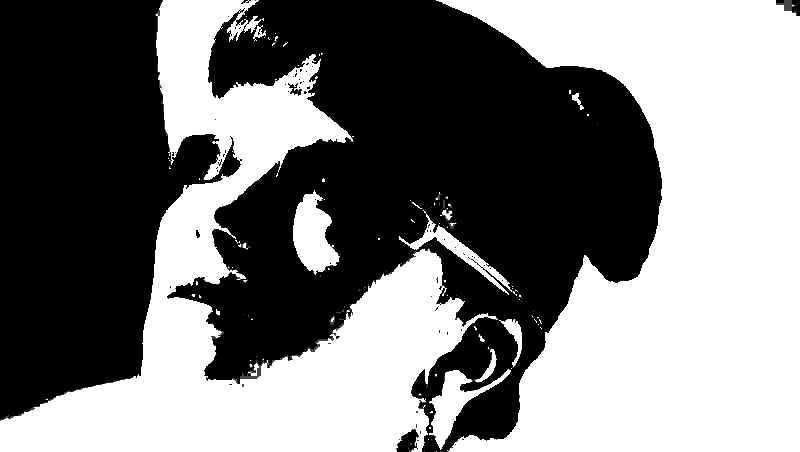

In [117]:
display(Image.fromarray(th5))

In [34]:
his, bins = np.histogram(g_img1, np.arange(0,257))

In [32]:
print(len(bins))
print(len(his))

257
256


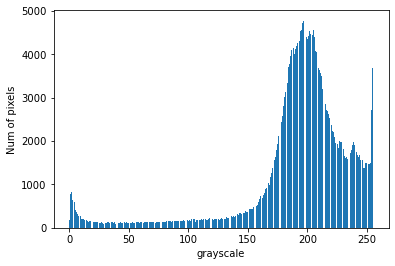

4771
4771 197


In [122]:
def f(his):
    x = list(range(len(his)))
    y = his
    plt.bar(x,y,align='center', width=0.8) # A bar chart
    plt.xlabel('grayscale')
    plt.ylabel('Num of pixels')
    plt.show()
f(his)
print(max(his))

max_el = 0
ind = 0
for i, ii in enumerate(his):
    if ii>max_el:
        max_el = ii
        ind = i
print(max_el, ind)

In [100]:
his

array([ 189,  783,  832,  646,  602,  402,  357,  312,  277,  265,  195,
        200,  204,  180,  171,  160,  133,  151,  157,  145,  126,  127,
        131,  132,  130,  103,  103,  143,  120,   92,  110,  106,  135,
        145,  112,  130,  125,  118,  139,   92,  109,  116,  110,  128,
        113,  120,  131,  113,  134,  119,  115,  104,  120,  127,  116,
        116,  130,  136,  123,  117,  127,  130,  120,  135,  141,  134,
        132,  141,  125,  126,  140,  143,  120,  135,  128,  141,  144,
        159,  135,  124,  134,  129,  148,  157,  154,  159,  140,  157,
        162,  154,  157,  165,  153,  164,  168,  159,  170,  163,  153,
        170,  159,  170,  157,  200,  196,  193,  142,  174,  191,  188,
        171,  194,  191,  193,  196,  177,  191,  197,  228,  200,  202,
        183,  207,  203,  198,  214,  188,  210,  218,  214,  212,  214,
        248,  225,  231,  251,  270,  243,  261,  256,  265,  319,  289,
        332,  336,  329,  340,  345,  376,  370,  3

In [101]:
bins

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [99]:
np.arange(256)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [21]:
def adaptive_thresh(input_img):

    h, w = input_img.shape

    S = w/8
    s2 = S/2
    T = 15.0

    #integral img
    int_img = np.zeros_like(input_img, dtype=np.uint32)
    for col in range(1, w):
        for row in range(1, h):
            int_img[row,col] = input_img[0:row,0:col].sum()

    #output img
    out_img = np.zeros_like(input_img)   

    print("start")

    for col in range(w):
        for row in range(h):
            #SxS region
            y0 = int(max(row-s2, 0))
            y1 = int(min(row+s2, h-1))
            x0 = int(max(col-s2, 0))
            x1 = int(min(col+s2, w-1))

            count = (y1-y0)*(x1-x0)

            sum_ = int_img[y1, x1]-int_img[y0, x1]-int_img[y1, x0]+int_img[y0, x0]

            if input_img[row, col]*count < sum_*(100.-T)/100.:
                out_img[row,col] = 0
            else:
                out_img[row,col] = 255

    return out_img

In [143]:
th5_2 = adaptive_thresh(g_img2)

start


C:\Users\igors\AppData\Local\Temp\ipykernel_5368\2033736300.py:30: RuntimeWarning: overflow encountered in ulonglong_scalars
  sum_ = int_img[y1, x1]-int_img[y0, x1]-int_img[y1, x0]+int_img[y0, x0]


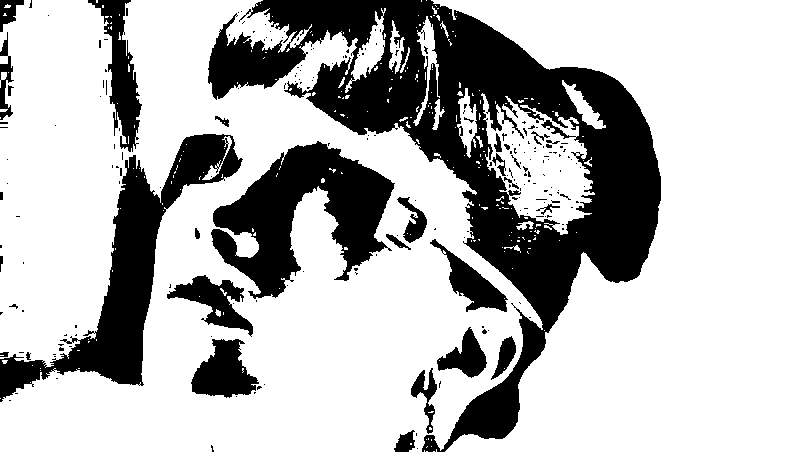

In [144]:
display(Image.fromarray(th5_2))

In [22]:
th6 = adaptive_thresh(g_img3)

start


C:\Users\igors\AppData\Local\Temp\ipykernel_26240\3489826206.py:30: RuntimeWarning: overflow encountered in ulonglong_scalars
  sum_ = int_img[y1, x1]-int_img[y0, x1]-int_img[y1, x0]+int_img[y0, x0]


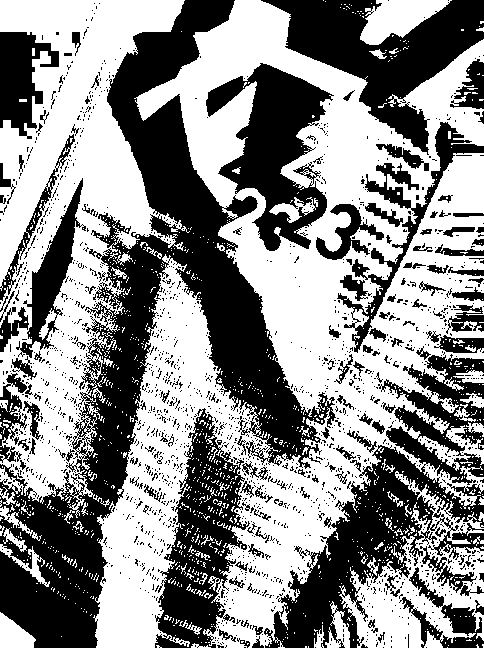

In [23]:
display(Image.fromarray(th6))

In [17]:
th6_2 = binary_otsu(g_img3)

122


C:\Users\igors\AppData\Local\Temp\ipykernel_26240\716714435.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  mub = np.sum(bins[:t]*his[:t])/ np.sum(his[:t])
C:\Users\igors\AppData\Local\Temp\ipykernel_26240\716714435.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  muf = np.sum(bins[t:]*his[t:])/ np.sum(his[t:])


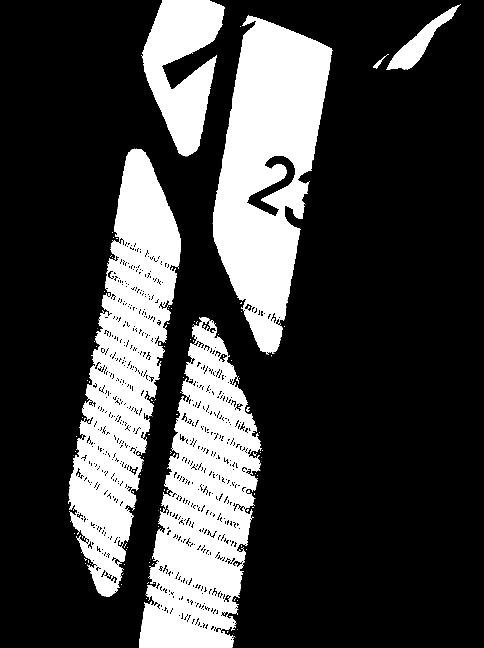

In [18]:
display(Image.fromarray(th6_2))